In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
model = keras.Sequential([
    layers.Dense(units=3, input_shape=[3],activation="relu"),
    layers.Dense(units=1,activation="relu")
])
print(model.weights)

[<tf.Variable 'dense/kernel:0' shape=(3, 3) dtype=float32, numpy=
array([[-0.9643829 , -0.17950225,  0.6901581 ],
       [-0.23432255,  0.45853353, -0.13057804],
       [-0.81405187, -0.04366064,  0.64494777]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>, <tf.Variable 'dense_1/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.99864167],
       [ 0.5307156 ],
       [ 0.85279953]], dtype=float32)>, <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(optimizer='adam', loss='mae')

In [5]:
training_x=np.array([[0,0,0],
            [0,0,1],
            [0,1,0],
            [0,1,1],
            [1,0,0],
            [1,0,1],
            [1,1,0],
            [1,1,1],
           ])
training_y=np.array([[0,0,0,1,0,1,0,1]]).T

df2=pd.DataFrame(np.append(training_x,training_y,axis=1),columns=['x1', 'x2', 'x3','y'])
df2

,x1,x2,x3,y
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,1,1
4,1,0,0,0
5,1,0,1,1
6,1,1,0,0
7,1,1,1,1


In [6]:
history=model.fit(training_x,training_y,batch_size=8,epochs=2000,verbose=0)

Text(0, 0.5, 'Error')

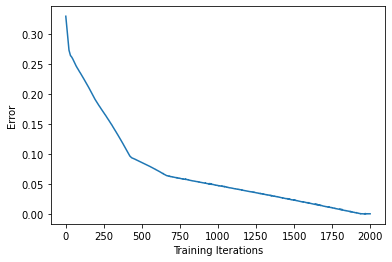

In [7]:
plt.plot(history.history['loss'])
plt.xlabel("Training Iterations")
plt.ylabel("Error")

In [8]:
#Predicting value for a list of input values
y=model.predict(training_x)
print(y)

[[0.       ]
 [0.       ]
 [0.       ]
 [0.9995655]
 [0.       ]
 [1.0003738]
 [0.       ]
 [1.0003883]]


In [9]:
#Predicting value for a single input
output=model.predict(np.array([[1,1,1]]))
print(output)

[[1.0003883]]
